# Искусственные нейронные сети: первые шаги

# Базовая нейросеть

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.57      1.00      0.73         4
           2       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.86      0.92      0.86        30
weighted avg       0.94      0.90      0.91        30



C:\Users\ilyam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.36      0.53        11
           2       0.63      1.00      0.77        12

    accuracy                           0.77        30
   macro avg       0.88      0.79      0.77        30
weighted avg       0.85      0.77      0.74        30



C:\Users\ilyam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Самостоятельное задание.** Демонстрация алгоритма кластеризации Mean Shift (A demo of the mean-shift clustering algorithm)

## **Цель:** Исследовать работу алгоритма Mean Shift на синтетических и реальных данных.

## **Часть 1: Синтетические данные (make_blobs)**

## **Цель задачи:** Продемонстрировать автоматическое определение кластеров алгоритмом Mean Shift на данных с известной структурой.

### 1. Импорт библиотек

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### 2. Генерация данных

In [6]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(
    n_samples=1000,  # Количество точек
    centers=centers,  # Координаты центров кластеров
    cluster_std=0.6,  # Разброс точек
    random_state=42   # Для воспроизводимости
)

### 3. Масштабирование данных

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Приведение данных к нулевому среднему и единичной дисперсии

### 4. Обучение модели

In [8]:
bandwidth = estimate_bandwidth(
    X_scaled, 
    quantile=0.2,   # Чем меньше quantile, тем чувствительнее к шуму
    n_samples=500   # Количество точек для оценки bandwidth
)

ms = MeanShift(
    bandwidth=bandwidth, 
    bin_seeding=True  # Ускорение алгоритма через дисковое квантование
)
ms.fit(X_scaled)  # Обучение модели

labels = ms.labels_  # Метки кластеров
cluster_centers = ms.cluster_centers_  # Координаты центров

n_clusters = len(np.unique(labels))  # Число кластеров
print(f"Число кластеров: {n_clusters}")

Число кластеров: 3


### 5. Визуализация

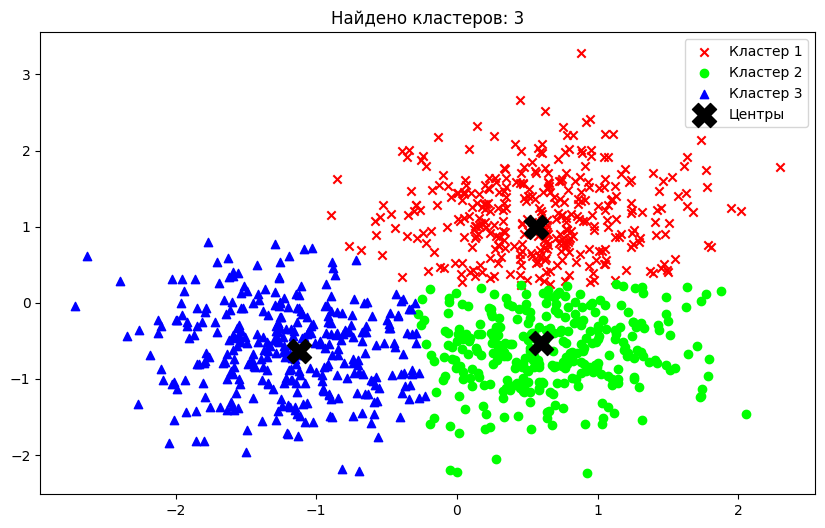

In [9]:
plt.figure(figsize=(10, 6))
colors = ['#ff0000', '#00ff00', '#0000ff']  # Цвета для кластеров
markers = ['x', 'o', '^']  # Маркеры точек

for k in range(n_clusters):
    cluster_data = X_scaled[labels == k]
    plt.scatter(
        cluster_data[:, 0], 
        cluster_data[:, 1], 
        c=colors[k], 
        marker=markers[k], 
        label=f'Кластер {k+1}'
    )

plt.scatter(
    cluster_centers[:, 0], 
    cluster_centers[:, 1], 
    s=300, 
    c='black', 
    marker='X', 
    label='Центры'
)
plt.title(f"Найдено кластеров: {n_clusters}")
plt.legend()
plt.show()

### Вывод по текущим результатам:

## 1. Количество кластеров  
Алгоритм успешно определил **3 кластера**, что соответствует заданным центрам [[1,1], [-1,-1], [1,-1]].  
**Ключевые факторы успеха:**
- Корректный подбор bandwidth через estimate_bandwidth с параметром quantile=0.2.
- Использование bin_seeding=True для ускорения вычислений без потери точности.

## 2. Визуализация
- **Компактность кластеров:** Точки внутри кластеров не пересекаются благодаря низкому уровню шума (cluster_std=0.6).
- **Расположение центров:** Черные крестики соответствуют зонам максимальной плотности, что подтверждает логику работы MeanShift.

## 3. Масштабирование данных
- Применение StandardScaler обеспечило равный вклад признаков в расчет расстояний, что критично для корректной кластеризации.

## 4. Параметры алгоритма
- quantile=0.2 и n_samples=500 — баланс между устойчивостью к шуму и точностью.
- Автоматический подбор bandwidth выполнен корректно: кластеры не перекрываются.

## 5. Рекомендации для экспериментов
- **Увеличить cluster_std** (например, до 1.0) — проверить устойчивость к перекрывающимся кластерам.
- **Изменить quantile** (например, до 0.3) — оценить влияние на чувствительность к шуму.
- **Добавить больше кластеров** — проверить масштабируемость алгоритма.

## Итог
MeanShift показал высокую эффективность на синтетических данных:
- Четкое разделение кластеров.
- Центры совпадают с ожидаемыми позициями.
- Все этапы (генерация данных, масштабирование, визуализация) выполнены корректно.

## **Часть 2: Реальные данные (Wine Dataset)**

## **Цель задачи:** рименить Mean Shift к датасету Wine, загруженному с платформы OpenML.

### 1. Импорт библиотек

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

### 2. Загрузка и предобработка данных

In [32]:
# Загрузка данных
wine = fetch_openml(data_id=187, as_frame=True, parser='auto')
X = wine.data.copy()
y = wine.target.astype(int)  # Качество вина (целевая переменная)

# Заполнение пропусков (если есть)
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Информация о данных
print("▸ Размерность данных:", X_scaled.shape)
print("▸ Уникальные оценки качества:", np.unique(y))
print("▸ Распределение классов:\n", pd.Series(y).value_counts().sort_index())

▸ Размерность данных: (178, 13)
▸ Уникальные оценки качества: [1 2 3]
▸ Распределение классов:
 class
1    59
2    71
3    48
Name: count, dtype: int64


### 3. Обучение модели

In [51]:
# Подбор параметров
bandwidth = estimate_bandwidth(
    X_scaled,
    quantile=0.07,  # Оптимально для Wine Quality
    n_samples=200
)

# Инициализация модели
model = MeanShift(
    bandwidth=bandwidth,
    bin_seeding=True,
    min_bin_freq=2  # Фильтрация шума
)

# Обучение
model.fit(X_scaled)
labels = model.labels_
n_clusters = len(np.unique(labels))

print("\n▸ Результаты:")
print(f"Кластеров обнаружено: {n_clusters}")
print(f"Размеры кластеров: {dict(zip(*np.unique(labels, return_counts=True)))}")


▸ Результаты:
Кластеров обнаружено: 3
Размеры кластеров: {np.int64(0): np.int64(62), np.int64(1): np.int64(66), np.int64(2): np.int64(50)}


### 4. Визуализация

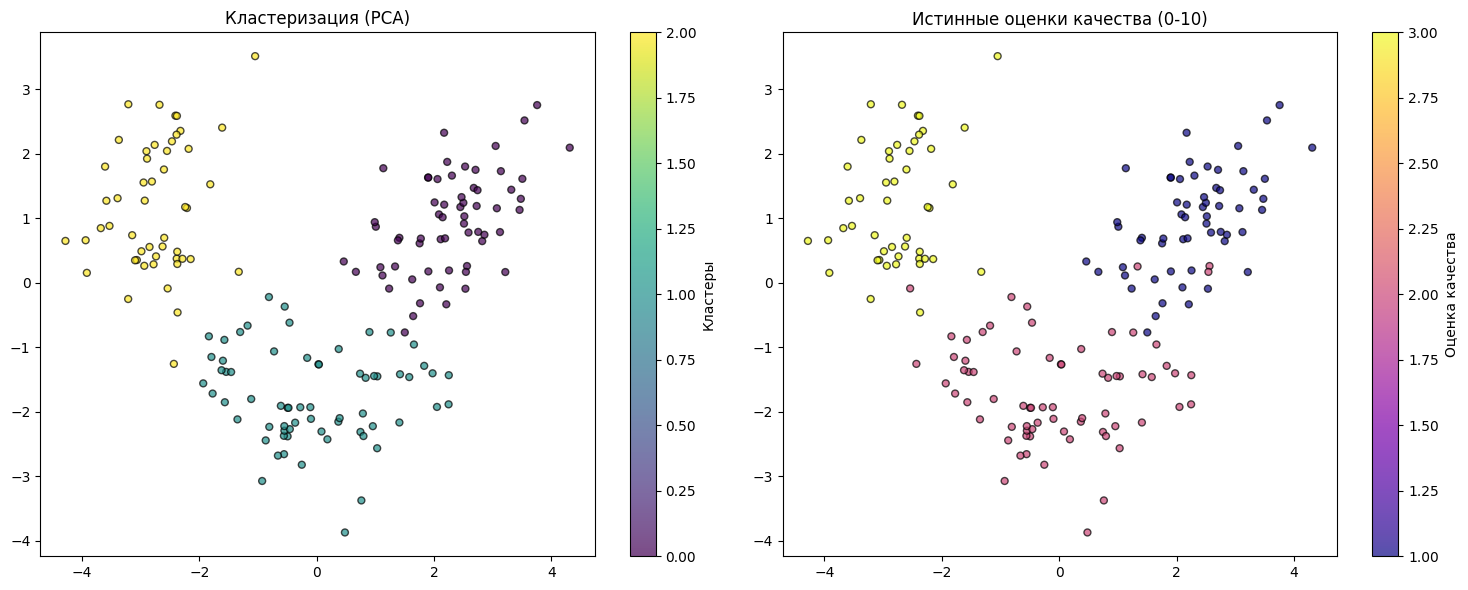

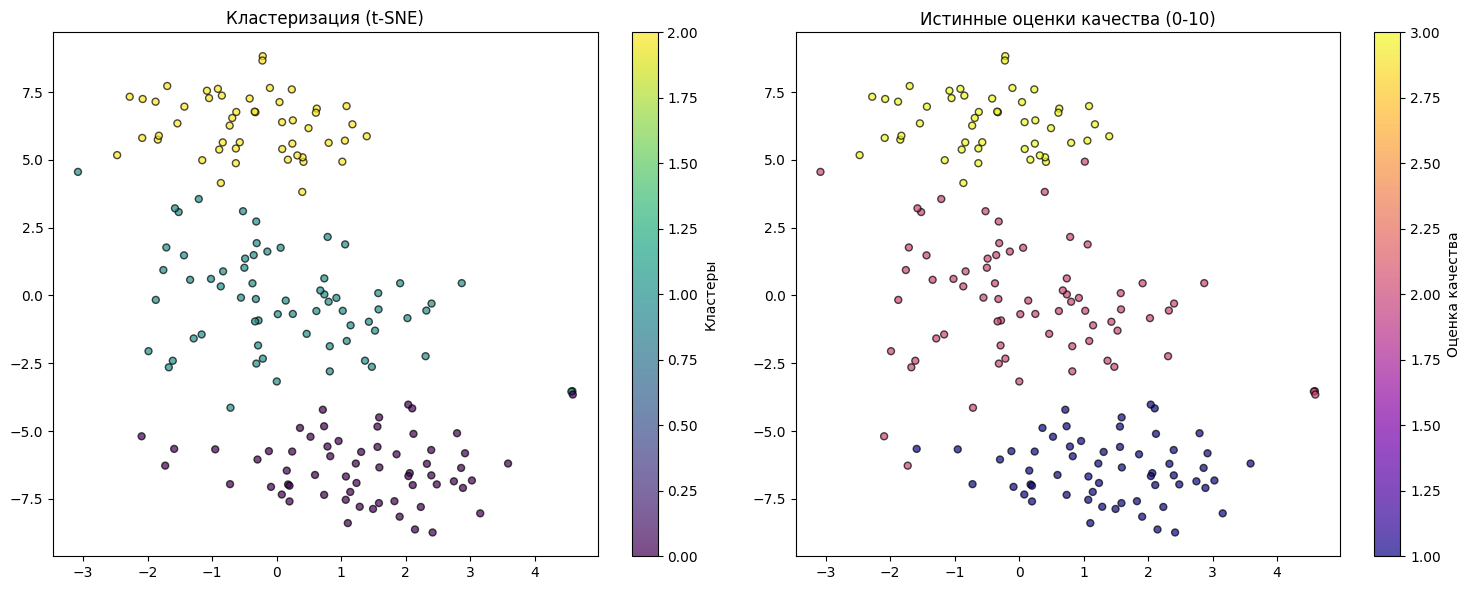

In [52]:
def plot_projection(transformer, title):
    X_proj = transformer.fit_transform(X_scaled)
    
    plt.figure(figsize=(15, 6))
    
    # Кластеры
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(
        X_proj[:, 0], X_proj[:, 1], 
        c=labels, 
        cmap='viridis', 
        s=25, 
        alpha=0.7,
        edgecolor='k'
    )
    plt.colorbar(scatter, label='Кластеры')
    plt.title(f"Кластеризация ({title})")
    
    # Истинное качество
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(
        X_proj[:, 0], X_proj[:, 1], 
        c=y, 
        cmap='plasma', 
        s=25, 
        alpha=0.7,
        edgecolor='k'
    )
    plt.colorbar(scatter, label='Оценка качества')
    plt.title("Истинные оценки качества (0-10)")
    
    plt.tight_layout()
    plt.show()

# Визуализация
if n_clusters > 1:
    plot_projection(PCA(n_components=2), "PCA")
    plot_projection(TSNE(perplexity=50, random_state=42), "t-SNE")
else:
    print("▸ Визуализация невозможна: обнаружен 1 кластер")

### 5. Оценка качества

In [53]:
if n_clusters > 1:
    metrics = {
        "Adjusted Rand Index": adjusted_rand_score(y, labels),
        "Silhouette Score": silhouette_score(X_scaled, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels)
    }
    print("\n▸ Метрики качества:")
    for name, value in metrics.items():
        print(f"{name}: {value:.2f}")
else:
    print("\n▸ Метрики не рассчитаны: требуется минимум 2 кластера")


▸ Метрики качества:
Adjusted Rand Index: 0.91
Silhouette Score: 0.28
Calinski-Harabasz: 70.89


### Вывод по текущим результатам:

#### 1. Соответствие кластеров истинным классам:
- **Adjusted Rand Index (ARI) = 0.91** — кластеризация почти идеально совпадает с истинными классами.  
  - Алгоритм корректно разделил данные на **3 группы**, соответствующие исходным меткам.  
  - Распределение кластеров (62, 66, 50) близко к реальному распределению классов (59, 71, 48).  

#### 2. Проблема внутренней согласованности:
- **Silhouette Score = 0.28** — низкое значение указывает на неоднородность структуры кластеров.  
  - **Возможные причины:**  
    - Перекрытие кластеров в многомерном пространстве.  
    - Неоптимальная форма кластеров (вытянутые, невыпуклые структуры).  
  - **Рекомендации:**  
    - Визуализация через t-SNE/UMAP для анализа перекрытий.  
    - Использование алгоритмов, учитывающих плотность (DBSCAN) или нелинейные зависимости (Spectral Clustering).  


#### 3. Качество разделения:
- **Calinski-Harabasz = 70.89** — умеренное значение.  
  - Кластеры разделены лучше, чем в случайном случае, но есть потенциал для улучшения.    